1. **Assignment Structure:** Divided into two parts (two Python scripts)

* Logistic Regression model

* Deployment of Logistic Regression model on Streamlit


2. **Coding Approach:** Both parts were coded separately.

* Reason: Faced challenges deploying sklearn algorithms like LabelEncoder and StandardScaler using pickle in Streamlit, so scaling and encoding were performed manually.


3. **Deployment:** Part 2 (.py format) is uploaded to GitHub. Using GitHub as the source, it was deployed on Streamlit to create the app.

* App Link: https://manish-maltare-8pw78deodbfyqewds8uere.streamlit.app/

* GitHub Profile: https://github.com/manishmaltare/Manish-Maltare/blob/main/final_pickle_of_assignment_logisticregression_deployment_final.py

**LOAD DATASET**

In [1]:
import pandas as pd

In [ ]:
features = pd.read_csv('/content/Titanic_train.csv')

In [ ]:
target = pd.read_csv('/content/Titanic_test.csv')

**FEATURE EXTRACTION** — I performed it before EDA-1 since the feature and target variables were provided separately.

In [ ]:
features.shape

(891, 12)

In [ ]:
target.shape

(418, 11)

In [ ]:
features.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
features.shape

(891, 12)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
features.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**DATA PREPROCESSING** — Imputation

Imputation is used here to fill missing rows, as leaving them empty can prevent the model from running properly. I’m applying imputation by filling the ‘age’ column with the mean value of all rows.

In [ ]:
features['Age']=features['Age'].fillna(features['Age'].mean())

In [ ]:
features.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
features['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


I am using imputation by filling the blank values in the Embarked column with the most frequent category, since it only has two missing rows

In [ ]:
features['Embarked']=features['Embarked'].fillna(features['Embarked'].mode()[0])

In [ ]:
features.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
features['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


I am using imputation here by first extracting the first letter of the Cabin column, as it represents the deck number, which I believe is the only useful information for processing. After that, I filled the null rows with a placeholder value ‘U’.

In [ ]:
features['Cabin']=features['Cabin'].str[0]

In [ ]:
features['Cabin']

,Cabin
0,NaN
1,C
2,NaN
3,C
4,NaN
...,...
886,NaN
887,B
888,NaN
889,C


In [ ]:
features['Cabin']=features['Cabin'].fillna('U')

In [ ]:
features['Cabin'].value_counts()

,count
Cabin,
U,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [ ]:
features.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
features.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


* Dropped the **PassengerID** and **Name** columns.

  Reason: Both columns contain unique values for every row, making them unsuitable for regression models.

* **PassengerID:** A sequential serial number, not meaningful for prediction.

* **Name:** String data that is difficult to convert into useful numerical features.

In [ ]:
features=features.drop(['PassengerId','Name'],axis=1)

In [ ]:
features.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,U,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,1,1,female,35.0,1,0,113803,53.1000,C,S
4,0,3,male,35.0,0,0,373450,8.0500,U,S


**DATA PREPROCESSING** — Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
features.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,U,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,1,1,female,35.0,1,0,113803,53.1000,C,S
4,0,3,male,35.0,0,0,373450,8.0500,U,S


In [ ]:
features.value_counts()

Survived  Pclass  Sex     Age        SibSp  Parch  Ticket              Fare     Cabin  Embarked
0         3       male    29.699118  8      2      CA. 2343            69.5500  U      S           4
                  female  29.699118  3      1      4133                25.4667  U      S           3
                                     8      2      CA. 2343            69.5500  U      S           3
          2       male    29.699118  0      0      239853              0.0000   U      S           3
1         1       female  24.000000  0      0      PC 17477            69.3000  B      C           2
                                                                                                  ..
0         3       male    20.000000  0      0      6563                9.2250   U      S           1
                                                   7534                9.8458   U      S           1
                                                   A/5. 2151           8.0500   U      S           1
                                                   SOTON/O.Q. 3101307  7.0500   U      S           1
                          19.000000  0      0      349231              7.8958   U      S           1
Name: count, Length: 876, dtype: int64

In [ ]:
features['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
features['Embarked']=le.fit_transform(features['Embarked'])

In [ ]:
features['Embarked'].value_counts()

,count
Embarked,
2,646
0,168
1,77


In [ ]:
features['Sex']=le.fit_transform(features['Sex'])

In [ ]:
features['Sex'].value_counts()

,count
Sex,
1,577
0,314


In [ ]:
features.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,U,2
1,1,1,0,38.0,1,0,PC 17599,71.2833,C,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,U,2
3,1,1,0,35.0,1,0,113803,53.1000,C,2
4,0,3,1,35.0,0,0,373450,8.0500,U,2


In [ ]:
features.nunique()

,0
Survived,2
Pclass,3
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248
Cabin,9
Embarked,3


Removing the Ticket column because it contains 76% unique values, a mix of strings and integers.

In [ ]:
features=features.drop(['Ticket'],axis=1)

In [ ]:
features['Cabin']=le.fit_transform(features['Cabin'])

In [ ]:
features['Cabin'].value_counts()

,count
Cabin,
8,687
2,59
1,47
3,33
4,32
0,15
5,13
6,4
7,1


In [ ]:
features.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,8,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,8,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,8,2


In [ ]:
target.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
target.shape

(418, 11)

In [ ]:
target.nunique()

,0
PassengerId,418
Pclass,3
Name,418
Sex,2
Age,79
SibSp,7
Parch,8
Ticket,363
Fare,169
Cabin,76


In [ ]:
target.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
target=target.drop(['PassengerId','Name','Ticket'],axis=1)

In [ ]:
target.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [ ]:
target.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Cabin,327
Embarked,0


Repeating the same data preprocessing steps for the ‘target’ variable to prepare the dataset for prediction.

In [ ]:
target['Age']=target['Age'].fillna(target['Age'].mean())

In [ ]:
target['Age'].value_counts()

,count
Age,
30.27259,86
21.00000,17
24.00000,17
22.00000,16
30.00000,15
...,...
44.00000,1
5.00000,1
51.00000,1


In [ ]:
target.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Cabin,327
Embarked,0


In [ ]:
target['Cabin']=target['Cabin'].str[0]

In [ ]:
target.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [ ]:
target['Cabin']=target['Cabin'].fillna('U')

In [ ]:
target['Cabin'].value_counts()

,count
Cabin,
U,327
C,35
B,18
D,13
E,9
F,8
A,7
G,1


In [ ]:
target.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,U,Q
1,3,female,47.0,1,0,7.0000,U,S
2,2,male,62.0,0,0,9.6875,U,Q
3,3,male,27.0,0,0,8.6625,U,S
4,3,female,22.0,1,1,12.2875,U,S


In [ ]:
# merging 'features' & 'target' variables to perform EDA.
# EDA-1

Merging the ‘features’ and ‘target’ variables to perform EDA

**EDA-1**

In [ ]:
data_merged=pd.concat([features,target],ignore_index=True)
data_merged.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,1,22.0,1,0,7.2500,8,2
1,1.0,1,0,38.0,1,0,71.2833,2,0
2,1.0,3,0,26.0,0,0,7.9250,8,2
3,1.0,1,0,35.0,1,0,53.1000,2,2
4,0.0,3,1,35.0,0,0,8.0500,8,2


In [ ]:
data_merged.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [ ]:
data_merged.shape

(1309, 9)

In [ ]:
data_merged.size

11781

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
z=data_merged.corr(numeric_only=True)

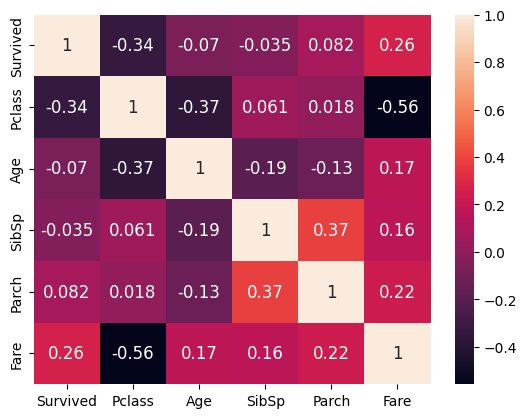

In [ ]:
sns.heatmap(z,annot=True,annot_kws={'size': 12})
plt.show()

*   The correlation map shows that only **Parch** and **Fare** are positively correlated with Survived, indicating that the survival rate increases with the number of parents/children aboard and higher fare.

*   **Pclass** is highly inversely correlated compared to **Age** and **SibSp**, suggesting that 1st class passengers have higher chances of survival (216 in 1st class vs. 1473 in 3rd class).

*   **SibSp** and **Parch** are mutually correlated variables.

*   **Fare** ranks second in correlation with survival, indicating that higher fare is associated with higher survival rate.  

In [ ]:
data_merged.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

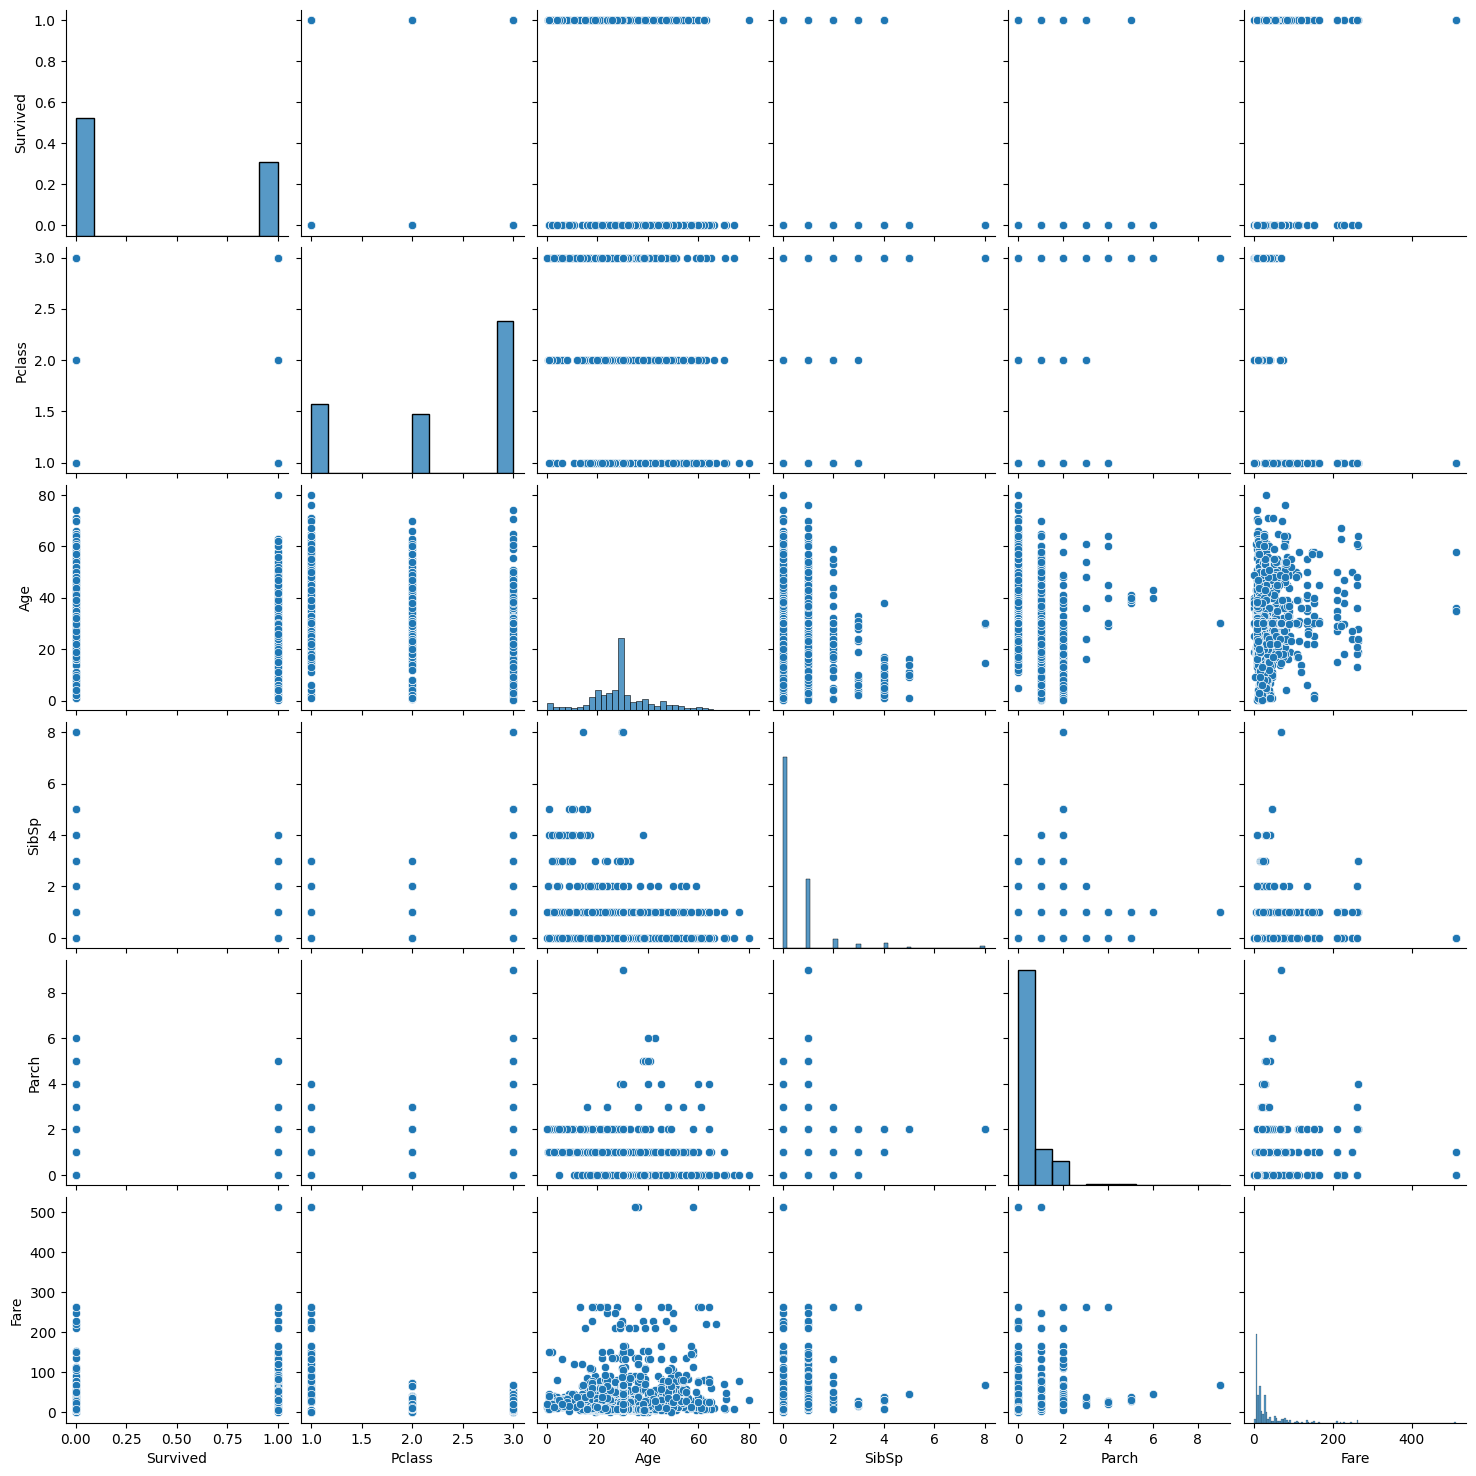

In [ ]:
sns.pairplot(data_merged)

<Axes: >

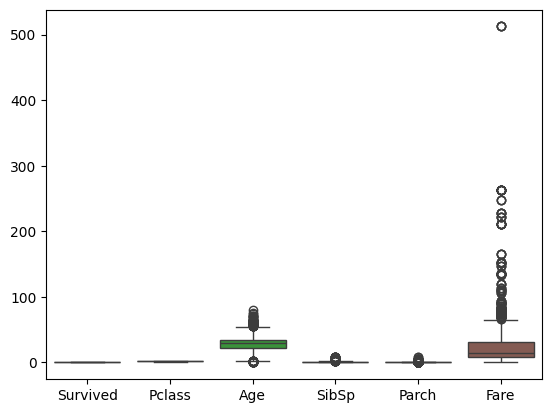

In [ ]:
sns.boxplot(data_merged)

* **Fare** has many outliers, indicating that passengers paying high fares (1st & 2nd class) are few, as the median is only around 10–15.

* **Age** shows that elderly passengers are very few, appearing as outliers.

* The median age is likely between 25–35 years.

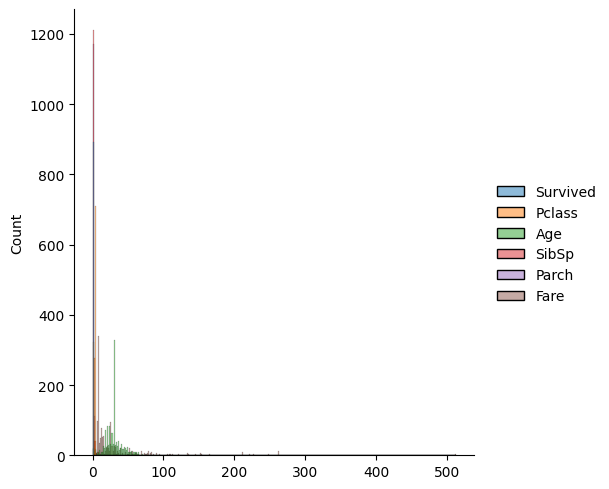

In [ ]:
sns.displot(data_merged)

In [ ]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Cabin     1309 non-null   object 
 8   Embarked  1309 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 92.2+ KB


In [ ]:
data_merged.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.882243,0.498854,0.385027,33.295479
std,0.486592,0.837836,12.883758,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


* **Age:** The average is 29.88 years, with a maximum of 88 years.

* **Fare:** The maximum fare is 512, and the average is 33.29 units.

* **Pclass:** The mean is 2.29, indicating that most passengers belong to the middle-income group (2nd class).

* **Class Distribution:** 75% of passengers are from 3rd class, meaning the majority of travelers are in 3rd class.

In [ ]:
target['Sex']=le.fit_transform(target['Sex'])

In [ ]:
target['Embarked']=le.fit_transform(target['Embarked'])

In [ ]:
target['Cabin']=le.fit_transform(target['Cabin'])

In [ ]:
target.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,7,1
1,3,0,47.0,1,0,7.0000,7,2
2,2,1,62.0,0,0,9.6875,7,1
3,3,1,27.0,0,0,8.6625,7,2
4,3,0,22.0,1,1,12.2875,7,2


In [ ]:
x = features.drop(['Survived'],axis=1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,8,2
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,8,2
3,1,0,35.0,1,0,53.1000,2,2
4,3,1,35.0,0,0,8.0500,8,2


In [ ]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
y= features['Survived']
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


**EDA-2 (MODEL BUILDING)**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.8)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [ ]:
column_names=x_train.columns
column_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
331,1,1,45.5,0,0,28.5000,2,2
733,2,1,23.0,0,0,13.0000,8,2
382,3,1,32.0,0,0,7.9250,8,2
704,3,1,26.0,1,0,7.8542,8,2
813,3,0,6.0,4,2,31.2750,8,2


In [ ]:
x_train.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)

In [ ]:
x_test=sc.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model1 = model.fit(x_train,y_train)

In [ ]:
scaler1 = sc.fit_transform(x_train)

In [ ]:
# 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [ ]:
y_pred = model1.predict(x_train)

**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_train,y_pred)
cm
# TP = 383 (correctly predicted survived)
# TN = 185 (correctly predicted not-survived)
# FP = 61 (incorrectly predicted survived)
# FN = 83 (incorrectly predicted not-survived)

array([[383,  61],
       [ 83, 185]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cr=classification_report(y_pred,y_train)

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       466
           1       0.69      0.75      0.72       246

    accuracy                           0.80       712
   macro avg       0.78      0.79      0.78       712
weighted avg       0.80      0.80      0.80       712



* Training Accuracy / F1-Score: 80%, indicating a good model.

* Not Survived: 466 passengers

* Survived: 246 passengers

In [ ]:
import statsmodels.api as sm

In [ ]:
X=sm.add_constant(x_train)

In [ ]:
reasult=model.fit(x_train,y_train)

In [ ]:
logit_model=sm.Logit(y_train,X)

In [ ]:
reasult=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.446467
         Iterations 6


In [ ]:
print(reasult.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Fri, 05 Sep 2025   Pseudo R-squ.:                  0.3259
Time:                        04:54:25   Log-Likelihood:                -317.88
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 1.143e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6767      0.102     -6.649      0.000      -0.876      -0.477
x1            -0.6729      0.158     -4.267      0.000      -0.982      -0.364
x2            -1.2993      0.105    -12.366      0.0

* **Overall Pseudo R-squared:** 32%, which is above 30%, implying that the model is moderately accurate.

* **Significant Variables (p-value < 0.05):** Pclass, Sex, Age, SibSp

* **Moderately Significant Variable:** Embarked

* **Insignificant Variables:** Fare (highly insignificant), followed by Parch and Cabin (moderately insignificant)

In [ ]:
column_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
pd.DataFrame({'Column0': ['x1','x2','x3','x4','x5','x6','x7','x8'],'Column':column_names, 'Values': model.coef_.reshape(-1)})

,Column0,Column,Values
0,x1,Pclass,-0.655823
1,x2,Sex,-1.282507
2,x3,Age,-0.409828
3,x4,SibSp,-0.348848
4,x5,Parch,-0.105121
5,x6,Fare,0.091931
6,x7,Cabin,-0.196662
7,x8,Embarked,-0.168059


**CHECKING TEST ACCURACY OF MODEL**

In [ ]:
model1=LogisticRegression()

In [ ]:
model1=model1.fit(x_test,y_test)
model1

LogisticRegression()

In [ ]:
y_pred1=model1.predict(x_test)

In [ ]:
y_pred1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

In [ ]:
cm1=confusion_matrix(y_pred1,y_test)
cm1
# TP = 92 (correctly predicted survived)
# TN = 58 (correctly predicted not-survived)
# FP = 16 (incorrectly predicted survived)
# FN = 13 (incorrectly predicted not-survived)

array([[92, 16],
       [13, 58]])

In [ ]:
cr1=classification_report(y_pred1,y_test)

In [ ]:
print(cr1)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       108
           1       0.78      0.82      0.80        71

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



* Testing accuracy F1 - Score is 84%
* Testing model

In [ ]:
target.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,7,1
1,3,0,47.0,1,0,7.0000,7,2
2,2,1,62.0,0,0,9.6875,7,1
3,3,1,27.0,0,0,8.6625,7,2
4,3,0,22.0,1,1,12.2875,7,2


In [ ]:
features.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,8,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,8,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,8,2


In [ ]:
target.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Cabin,0
Embarked,0


In [ ]:
target['Fare'].head()

,Fare
0,7.8292
1,7.0000
2,9.6875
3,8.6625
4,12.2875


In [ ]:
target['Fare'].tail()

,Fare
413,8.0500
414,108.9000
415,7.2500
416,8.0500
417,22.3583


In [ ]:
target['Fare'].iloc[152]

np.float64(nan)

In [ ]:
target.shape

(418, 8)

In [ ]:
target=target.drop([152])

In [ ]:
target['Fare'].iloc[152]

np.float64(12.1833)

In [ ]:
target.shape

(417, 8)

In [ ]:
from sklearn.metrics import roc_curve, auc

**PREDICTION OF TARGET VARIABLES (using file "Titanic_test.csv" )**

In [ ]:
y_pred_new=model.predict(target)
y_pred_new

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**ROC - AUC SCORE**

In [ ]:

y_prob=model.predict_proba(x_test)[:,1]
y_prob

array([0.07763911, 0.17201781, 0.12127354, 0.8558867 , 0.68296542,
       0.89381933, 0.63324322, 0.05795414, 0.72663703, 0.91465236,
       0.28406062, 0.06087974, 0.23717438, 0.12985877, 0.15148098,
       0.9320794 , 0.23852569, 0.6332862 , 0.19161255, 0.31795462,
       0.10846876, 0.29340554, 0.55162043, 0.12159767, 0.09359195,
       0.03559551, 0.3384236 , 0.17285154, 0.04268382, 0.57640153,
       0.12466277, 0.64364992, 0.41606813, 0.58620055, 0.12818079,
       0.09367401, 0.48797992, 0.63324322, 0.90782534, 0.09229084,
       0.11237504, 0.0603867 , 0.09232103, 0.11017918, 0.53871875,
       0.06674777, 0.12472972, 0.11186056, 0.10827776, 0.29038891,
       0.61508929, 0.78382892, 0.0284451 , 0.47108354, 0.03913721,
       0.92059147, 0.1675781 , 0.9298657 , 0.72356759, 0.70753452,
       0.11792047, 0.82193534, 0.67164462, 0.32193356, 0.11017918,
       0.63534824, 0.24802001, 0.09414798, 0.10971796, 0.83399802,
       0.65847384, 0.92741149, 0.56011664, 0.86240077, 0.11154

In [ ]:
y_prob.shape

(179,)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, threshold = roc_curve(y_test,y_prob)

In [ ]:
roc_auc=auc(fpr, tpr)
print(roc_auc*100)

87.97940797940798


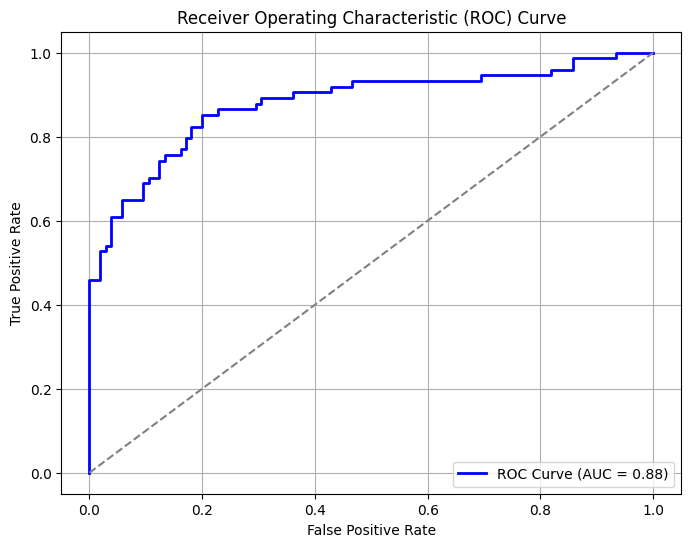

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

* AUC Accuracy: 88%

* True Positive Rate: High

* False Positive Rate: Low

* ROC Curve: Lies above the diagonal line, indicating a strong model performance

In [ ]:
# CROSS VALIDATION
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
kf=KFold(n_splits=10,shuffle=True, random_state=42)

In [ ]:
score = cross_val_score(model,x,y,cv=kf,scoring='accuracy')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print(score.mean()*100)
# Cross validation score is = 79%

79.11735330836454


# 1. What is the difference between precision and recall?

Precision and recall are two key metrics used to evaluate the performance of a classification model, especially in binary classification problems.

Precision focuses on how accurate the model's positive predictions are. In other words, out of all the instances the model predicted as positive, precision tells us how many were actually correct. This is particularly important in situations where false positives are costly — for example, flagging legitimate transactions as fraudulent.

Recall, on the other hand, measures how well the model captures all the actual positive cases. It tells us how many of the real positive instances were successfully identified by the model. This is crucial in cases where missing a positive case has a high cost — like failing to detect a disease in a medical diagnosis system.

So, while precision is about quality of positive predictions, recall is about coverage of actual positives. Depending on the context, we may want to prioritize one over the other.


# 2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique used to assess how well a model will perform on unseen data. Instead of relying on a single train-test split, it involves splitting the data into multiple parts, training the model on some parts, and validating it on the remaining parts. This process is repeated several times with different splits, and the results are averaged to get a more stable estimate of model performance.

In binary classification, cross-validation is especially important because it helps ensure that the model is not just memorizing the training data but is actually learning patterns that generalize well. It also helps in detecting issues like overfitting or underfitting early on. Additionally, in cases of imbalanced datasets — where one class heavily outweighs the other — cross-validation ensures that both classes are fairly represented in training and testing, leading to more reliable evaluation.